# Robinson边缘检测

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import skimage
import skimage.io
import imageio

In [2]:
src = imageio.imread('../datas/f4.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_RGB2GRAY)

In [9]:
def robinson_edge(src):
    gray = src
    if len(src.shape) > 2:
        gray = cv2.cvtColor(src,cv2.COLOR_RGB2GRAY)
    g1 = np.array([[1,  2,  1 ],[0, 0 , 0 ],[ -1, -2 ,-1]])#N
    g2 = np.array([[2,  1,  0 ],[1 ,0 ,-1  ],[   0, -1 ,-2]])# NE
    g3 = np.array([[1,  0, -1 ],[ 2, 0, -2  ],[   1,  0 ,-1]])# E
    g4 = np.array([[0, -1, -2 ],[  1, 0, -1  ],[   2,  1,  0]])# SE
    g5 = np.array([[-1, -2,-1],[  0 ,0 , 0  ],[1,  2,  1]])# S
    g6 = np.array([[-2, -1,  0 ],[ -1, 0 , 1  ],[   0,  1 , 2]])# SW
    g7 = np.array([[-1,  0,  1 ] ,[-2 ,0 , 2  ],[  -1,  0 , 1]])# W
    g8 = np.array([[ 0,  1,  2 ],[ -1 ,0 , 1  ],[  -2, -1 , 0]])# NW
    
    kernels = [g1,g2,g3,g4,g5,g6,g7,g8]
    res = np.zeros_like(gray)
    index = np.zeros_like(gray)
    for i,kernel in enumerate(kernels):
        img = cv2.filter2D(gray,-1,kernel)
        idx = (img > gray)
        res[idx] = gray[idx]
        index[idx] = 255
    return res,index

In [10]:
res,index = robinson_edge(gray)

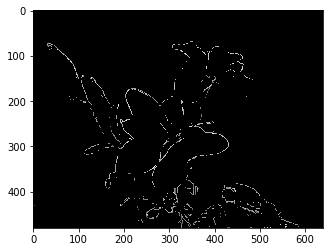

In [11]:
plt.imshow(res,'gray')

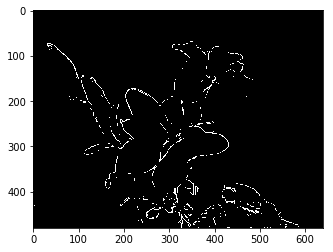

In [12]:
plt.imshow(index,'gray')